In [1]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

# ignore the warning if any
import warnings
warnings.filterwarnings("ignore")

# set row/columns
pd.options.display.max_columns= None
pd.options.display.max_rows= None
np.set_printoptions(suppress=True)

In [2]:
# read the dataset
df = pd.read_csv("/Users/mattmindur/Desktop/accepted_2007_to_2018Q4.csv")

In [3]:
# display top 5 rows to see how data looks like
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
# check the shape
df.shape

(2260701, 151)

In [5]:
# check the data frame information
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [6]:
# Generate descriptive statistics, so as to get the overall behaviour of different columns
# i.e. its mean, standard deviation, minimum/maximum value ,
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
#For numeric data, the result’s index will include count, mean, std, min, max as well as lower,
#50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. 
#The 50 percentile is the same as the median.
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [7]:
# check the number of NaN values (also known as Missing Values) present in each column
df.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

In [8]:
# Make a copy of df, so that we can apply all the operation on df_copy without modifying the content of df
df_copy = df.copy()

In [9]:
# drop all the NaN values, to see is it contains any rows after deleting all NaN values.
df_copy.dropna()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


- Since it is returing empty dataframe , we need to consider other preprocessing/ treatment on data to get rid of NaN (Missing) value

In [10]:
# compute the number of NaN values for each column
drop_nan = df_copy.isnull().sum()

# get the column having NaN value more than 30%
drop_nan = drop_nan[drop_nan.values > (len(df_copy) * 0.30)]

In [11]:
# get the column name
drop_nan.index

Index(['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount'

In [12]:
# delete those columns having Missing values more than 30%, because it is not wise to keep column 
# having most of the values are missing
df_copy.drop(labels= drop_nan.index, inplace = True, axis = 1)

In [13]:
df_copy.head() # display the top 5 rows of data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major

In [14]:
# compute the correlation matrix to know the name of all the columns which are dependent on each other
# if two columns (Also know as features or attributes) are dependent it means keeping one if enough for prediction
# we can reproduce the another feature from 1st one. hence delete the dependent feature
# even if we keep the dependent feature, it will not contribute in improving the accuracy.
# but it will make the program slow because of unnecessary features.

corr_matrix  = df_copy.corr().abs()

# remove dependent (highly correlated) features
# correlation coeff > 0.98

In [15]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation value greater than 0.98 (i.e. features to be strongly dependent)
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

# Drop features 
df_copy.drop(to_drop, axis=1, inplace=True)

In [16]:
# this is the list of features which is unnecessary (strongly dependent) and we need to delete this.
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'fico_range_high',
 'out_prncp_inv',
 'total_pymnt_inv',
 'num_rev_tl_bal_gt_0',
 'num_sats']

In [17]:
df_copy.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,4421.723917,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,25679.660000,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,22705.924294,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,31464.010000,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,11740.500000,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0

In [18]:
# based on preliminary observation, these are the extra useless columns which will not help in prediction. 
Col_drop = ['id', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'title', 'zip_code', 'addr_state',
            'earliest_cr_line', 'initial_list_status', 'out_prncp', 'total_pymnt', 'last_pymnt_d', 'last_pymnt_amnt',
            'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'policy_code', 'hardship_flag',
            'disbursement_method', 'debt_settlement_flag']

In [19]:
# drop these features as well
df_copy.drop(columns =Col_drop, inplace = True )

In [20]:
# check the shape
df_copy.shape

(2260701, 65)

In [21]:
# get the loan status and their respective count
df_copy['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

- we consider the loan with Fully paid or charged off and ignore all the remaining loans
- Also consider 'Does not meet the credit policy. Status:Fully Paid' as Fully Paid
- and 'Does not meet the credit policy. Status:Charged Off' as Charged Off

In [22]:
# replace Does not meet the credit policy. Status:Charged Off' as charged off
# and Does not meet the credit policy. Status:Fully Paid' as Fully Paid

df_copy['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'],['Fully Paid','Charged Off'],inplace=True)

In [23]:
df_copy['loan_status'].value_counts()

Fully Paid            1078739
Current                878317
Charged Off            269320
Late (31-120 days)      21467
In Grace Period          8436
Late (16-30 days)        4349
Default                    40
Name: loan_status, dtype: int64

In [24]:
# Now consider only Fully paid and charged off only
df_copy = df_copy[(df_copy['loan_status']=='Fully Paid') | (df_copy['loan_status']=='Charged Off')]

In [25]:
df_copy['loan_status'].value_counts()

Fully Paid     1078739
Charged Off     269320
Name: loan_status, dtype: int64

In [26]:
df_copy['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.021646
Charged Off    19.978354
Name: loan_status, dtype: float64

Fully Paid     80.021646
Charged Off    19.978354
Name: loan_status, dtype: float64


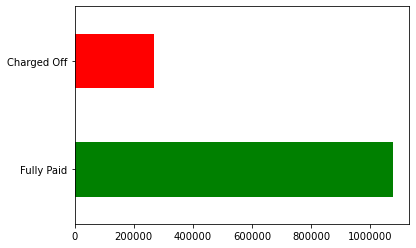

In [27]:
# visualize on the bar plot the count of 'fully paid' and 'Default'
plt.ticklabel_format(style='plain')
t = pd.value_counts(df_copy['loan_status'].values, sort=True)
t.plot.barh(color=['g','r'])
print(df_copy['loan_status'].value_counts(normalize=True)*100)
plt.show()

In [28]:
# again check for NaN values
df_copy.isnull().sum()

loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     78545
home_ownership                     0
annual_inc                         4
verification_status                0
loan_status                        0
purpose                            0
dti                              374
delinq_2yrs                       29
fico_range_low                     0
inq_last_6mths                    30
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       897
total_acc                         29
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
collections_12_mths_ex_med       145
a

# Handle NaN Value

In [29]:
for col in df_copy.columns:
    
    # replace float attributes with their median value
    if isinstance(df_copy[col][0], float):
        df_copy[col].fillna(df_copy[col].median(), inplace = True)
        
        # replace other attribute with their mode value
    else:
        df_copy[col].fillna(df_copy[col].mode()[0], inplace = True)

In [30]:
# again check for NaN values
df_copy.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
fico_range_low                0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

- Now there is no NaN Values. i.e. Missing values are handled properly

In [31]:
df_copy.dtypes

loan_amnt                     float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
purpose                        object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_

# categorical features

In [32]:
# get the categorical featues
# The columns with object dtype are the possible categorical features in a dataset.
category_column = df_copy.dtypes.index[df_copy.dtypes=='object']

In [33]:
# print categorical features and the count of their unique values.
# loop to print categorical features that are stored in the category_column variable
for i in category_column:
    print(i)
    print(df_copy[i].value_counts())
    print(20*'-')

term
 36 months    1023181
 60 months     324878
Name: term, dtype: int64
--------------------
grade
B    393095
C    382315
A    235188
D    201644
E     94186
F     32305
G      9326
Name: grade, dtype: int64
--------------------
sub_grade
C1    85616
B4    83275
B5    82636
B3    81900
C2    79356
C3    75127
C4    74553
B2    74079
B1    71205
C5    67663
A5    64054
A4    52254
D1    51443
D2    44981
A1    43681
D3    39461
A3    38009
A2    37190
D4    35720
D5    30039
E1    23865
E2    21509
E3    18499
E4    15817
E5    14496
F1    10033
F2     7255
F3     6137
F4     4901
F5     3979
G1     3033
G2     2160
G3     1644
G4     1323
G5     1166
Name: sub_grade, dtype: int64
--------------------
emp_length
10+ years    521214
2 years      122092
< 1 year     108533
3 years      107863
1 year        88842
5 years       84326
4 years       80761
6 years       62877
8 years       60808
7 years       59724
9 years       51019
Name: emp_length, dtype: int64
--------------------
home

In [34]:
# there are lot of classification for sub_grade, hence delete it. Also its sub feature of grade
df_copy.drop('sub_grade', axis=1, inplace=True)

In [35]:
# Convert categorical features to neumerical values
df_copy['term'].replace((' 36 months', ' 60 months'),(36 ,60), inplace = True) 
df_copy['grade'].replace(('A','B','C','D','E','F','G'),(1,2,3,4,5,6,7), inplace = True) 
df_copy['emp_length'].replace(('10+ years','2 years','< 1 year','3 years','1 year','5 years','4 years','6 years','8 years','7 years','9 years'),(10,2,0.5,3,1,5,4,6,8,7,9), inplace  = True)
df_copy['home_ownership'].replace(('MORTGAGE', 'RENT','OWN','ANY', 'OTHER','NONE'),(1,2,3,4,5,6), inplace = True) 
df_copy['verification_status'].replace(('Source Verified', 'Verified','Not Verified'),(1,2,3), inplace = True) 
df_copy['loan_status'].replace(('Fully Paid', 'Charged Off'),(0,1), inplace = True) 
df_copy['purpose'].replace(('debt_consolidation', 'credit_card','home_improvement','other', 'major_purchase','medical','small_business','car','moving','vacation','house','wedding','renewable_energy','educational'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace = True) 
df_copy['application_type'].replace(('Individual','Joint App'),(1,2), inplace  = True)


In [36]:
df_copy.shape

(1348059, 64)

In [37]:
# plt.figure(figsize=(27,27))
# sns.heatmap(df_copy.corr(), annot=True, cmap='viridis', square = True)
# plt.show()

# Imbalance data

In [38]:
# percentage of paid /unpaid
df_copy['loan_status'].value_counts(normalize=True)*100

0    80.021646
1    19.978354
Name: loan_status, dtype: float64

In [39]:
# training and test set splitting

from sklearn.model_selection import train_test_split

# get x and y
x = df_copy.drop(columns='loan_status',axis=1)
y = df_copy['loan_status']

# feature scaling to bring the features into same range
# StandardScaler() transforms the data in such a manner that it has mean as 0 and standard deviation as 1.

scaler = StandardScaler()
scaler_data = scaler.fit_transform(x)

# split the data. 70% for training and 30% for testing
# this is a pretty common split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, shuffle = True)

# Baseline Models

In [40]:
from sklearn.dummy import DummyClassifier
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.8008693975045621


In [41]:
roc_auc_score(y_test, dummy_pred)

0.5

- 0 - Fully Paid
- 1 - Charged Off

As predicted our accuracy score for classifying all Loan as Fully Paid is 80.079%!

As the Dummy Classifier predicts only Class 1 (i.e. Fully Paid), it is clearly not a good option for our objective of correctly classifying.

Let's see how logistic regression performs on this dataset.

# Logistic Regression

In [42]:
# build the model
lr_model = LogisticRegression(random_state= 42)

# fit the model on training data
lr_model.fit(x_train,y_train)

# make prediction on test data
y_pred = lr_model.predict(x_test)

In [43]:
# get the accuracy
accuracy_score(y_test, y_pred)

0.9939196573841916

In [44]:
# Checking unique values
predictions = pd.DataFrame(y_pred)
predictions[0].value_counts()

0    325483
1     78935
Name: 0, dtype: int64

Logistic Regression outperformed the Dummy Classifier! We can see that it predicted 79042 instances of class 0 (i.e. charged off), so this is definitely an improvement. But can we do better?

Let's see if we can apply some techniques for dealing with class imbalance to improve these results.

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading. Metrics that can provide better insight include:

- Confusion Matrix: a talbe showing correct predictions and types of incorrect predictions.
- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
- Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
- F1: Score: the weighted average of precision and recall.
- Since our main objective with the dataset is to prioritize accuraltely classifying loan status, the recall score can be considered our main metric to use for evaluating outcomes.

In [45]:
# high recall high precision

In [46]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score

In [47]:
recall_score(y_test, y_pred)

0.9748174638652958

In [48]:
precision_score(y_test, y_pred)

0.9945398112370938

In [49]:
roc_auc_score(y_test, y_pred)

0.9867433743685666

In [50]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['true_fully_paid','true_charged_off'],
             index=['predict_fully_paid','predict_charged_off'])

,true_fully_paid,true_charged_off
predict_fully_paid,323455,431
predict_charged_off,2028,78504


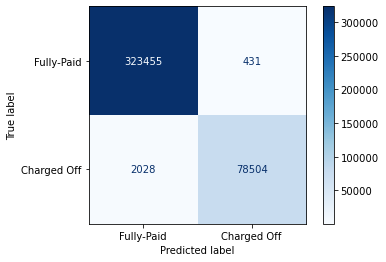

In [51]:
plot_confusion_matrix(lr_model, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'])

We have a very high accuracy score of 0.99 And from the confusion matrix, we can see we are misclassifying several observations leading to a recall score of 0.97 only.

# try other method
# 1. Oversampling Minority Class

# A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

In [52]:
X = pd.concat([x_train, y_train], axis=1)

In [53]:
fully_paid = X[X['loan_status']==0]
charged_off =  X[X['loan_status']==1]

In [54]:
from sklearn.utils import resample
# upsample minority
charged_off_upsampled = resample(charged_off,
                          replace=True, # sample with replacement
                          n_samples=len(fully_paid), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([fully_paid, charged_off_upsampled])

# check new class counts
upsampled['loan_status'].value_counts()

0    754853
1    754853
Name: loan_status, dtype: int64

In [55]:
# trying logistic regression again with the balanced dataset
y_train_upsampled = upsampled['loan_status']
X_train_upsampled = upsampled.drop('loan_status', axis=1)

upsampled = LogisticRegression(random_state= 42).fit(X_train_upsampled, y_train_upsampled)

upsampled_pred = upsampled.predict(x_test)
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9962143129138663

In [56]:
recall_score(y_test, upsampled_pred)

0.9873963145085184

In [57]:
precision_score(y_test, upsampled_pred)

0.9935526595279447

In [58]:
roc_auc_score(y_test, upsampled_pred)

0.9929015806810204

Our accuracy score increased a little bit after upsampling, the model is now predicting both classes more equally, making it an improvement over our plain logistic regression above.

# 2 .Undersampling Majority Class
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable. Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out

In [59]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
fully_paid_downsampled = resample(fully_paid,
                                replace = False, # sample without replacement
                                n_samples = len(charged_off), # match minority n
                                random_state = 42) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([fully_paid_downsampled, charged_off])

# checking counts
downsampled['loan_status'].value_counts()

0    188788
1    188788
Name: loan_status, dtype: int64

In [60]:
# trying logistic regression again with the balanced dataset
y_train_downsampled = downsampled['loan_status']
X_train_downsampled = downsampled.drop('loan_status', axis=1)

downsampled_lr = LogisticRegression(random_state= 42).fit(X_train_downsampled, y_train_downsampled)

downsampled_pred = downsampled_lr.predict(x_test)
# Checking accuracy
accuracy_score(y_test, downsampled_pred)

0.9965283444357076

In [61]:
recall_score(y_test, downsampled_pred)

0.9886753091938608

In [62]:
roc_auc_score(y_test, downsampled_pred)

0.9935781280968656

due to less training data, downsampling is not doing well

# Apply Grid Search on downsampled data with cross validation and regularizion
- to improve the accuracy

Downsampling is a mechanism that reduces the count of training samples falling under the majority class. Even out counts of target categories to handle imbalanced data

Grid search = the holy grail: it is a technique which will pass different values of C and Penalty variable to the model and check at which combination of these values model is performing best
And accordingly return those values of C and Penalty at which model perfomed best

In [63]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()

# Hyperparamaters
# A model is tried for each l1 and 0.001, l1 ad 0.01, l1 and 0.1, etc.
# A model is also tried for l2 and 0.001, l2 and 0.01, and l2 0.01 etc.

# penalty is for regularization, and we penalize many independent variables to prevent overfitting
# we want to generalize a model, not fit to data perfectly because future data may not have unique outliers
# we generalize to moel

# C is regularization parameter
# C is just lowering it to increase the regularization strength, it is a hyperparameter (set before training)
# C = 1/lambda so the lower the C, the more extreme the regularization
# In sci-kit 'C' parameter is inverse of lambda. Sci kit does implemented 'C' parameter to standardise


# the penalty is regularization
# C controls the strength of it (regularization) and 
# it is inverse regularization

LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
    'penalty': ['l1', 'l2'],
}   

# grid search with 3 fold cross validation, since dataset is huge , even 3 fold is enough
logreg_cv = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5,scoring='roc_auc',n_jobs=-1)
logreg_cv.fit(X_train_downsampled, y_train_downsampled)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.8min finished


Tuned Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2'}
Best score is 0.9984865566824219


In [64]:
c = logreg_cv.best_params_['C']
p = logreg_cv.best_params_['penalty']

log_model_downsampled = LogisticRegression(C=c, penalty=p, random_state= 42)
log_model_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_down = log_model_downsampled.predict(x_test)
roc_auc_score(y_test, y_pred_down)

0.993351526956436

In [65]:
accuracy_score(y_test, y_pred_down)

0.99643438224807

# Apply Grid Search on upsampled data with cross validation and regularizion

#Upsampling is a procedure where synthetically generated data points (corresponding to minority class) are injected into the dataset. After this process, the counts of both labels are almost the same. This equalization procedure prevents the model from inclining towards the majority class

In [66]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()

# paramaters
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
    'penalty': ['l1', 'l2'],
}   

# grid search with 3 fold cross validation, since dataset is huge , even 3 fold is enough
logreg_cv = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5,scoring='roc_auc',n_jobs=-1)
logreg_cv.fit(X_train_upsampled, y_train_upsampled)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  6.9min finished


Tuned Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2'}
Best score is 0.9985766963416051


In [67]:
c = logreg_cv.best_params_['C']
p = logreg_cv.best_params_['penalty']

log_model_upsampled = LogisticRegression(C=c, penalty=p, random_state= 42)
log_model_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_pred_up = log_model_upsampled.predict(x_test)
roc_auc_score(y_test, y_pred_up)

0.9931860083815113

In [68]:
accuracy_score(y_test, y_pred_up)

0.9962439851836467

# Results

In [69]:
# Support is a clarification report which displays all types of classification results
# Just understand recall, precision, F1, and auc_roc_score
# Don't worry about Weighted avg, micro etc.

print('***********Default Logistic Regression*************roc_auc_score:',roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('*********** Logistic Regression- upsampled*************roc_auc_score:',roc_auc_score(y_test, upsampled_pred))
print(classification_report(y_test, upsampled_pred))

print('*********** Logistic Regression- downsampled*************roc_auc_score:',roc_auc_score(y_test, downsampled_pred))
print(classification_report(y_test, downsampled_pred))

print('*********** Logistic Regression-upsampled- Grid search*************roc_auc_score:',roc_auc_score(y_test, y_pred_up))
print(classification_report(y_test, y_pred_up))

print('*********** Logistic Regression-downsampled-Grid search*************roc_auc_score:',roc_auc_score(y_test, y_pred_down))
print(classification_report(y_test, y_pred_down))

***********Default Logistic Regression*************roc_auc_score: 0.9867433743685666
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    323886
           1       0.99      0.97      0.98     80532

    accuracy                           0.99    404418
   macro avg       0.99      0.99      0.99    404418
weighted avg       0.99      0.99      0.99    404418

*********** Logistic Regression- upsampled*************roc_auc_score: 0.9929015806810204
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323886
           1       0.99      0.99      0.99     80532

    accuracy                           1.00    404418
   macro avg       1.00      0.99      0.99    404418
weighted avg       1.00      1.00      1.00    404418

*********** Logistic Regression- downsampled*************roc_auc_score: 0.9935781280968656
              precision    recall  f1-score   support

           0       1.00   

- 1) How to predict if the lender will fully pay the money: Using our Logistic regression Model which is having .9964 accuracy and .9933 as roc_auc_score
- 2) How to decrease the risk of charged off: first compute the loan payment prediction using our Model, if the model is saying that it will get paid fully, then only give the loan  

In [70]:
# actual loan status
np.where(y_test==1,'Fully Paid','Charged Off')

array(['Fully Paid', 'Charged Off', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Charged Off'], dtype='<U11')

In [71]:
# predicted loan status
np.where(downsampled_pred ==1,'Fully Paid','Charged Off')

array(['Fully Paid', 'Charged Off', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Charged Off'], dtype='<U11')

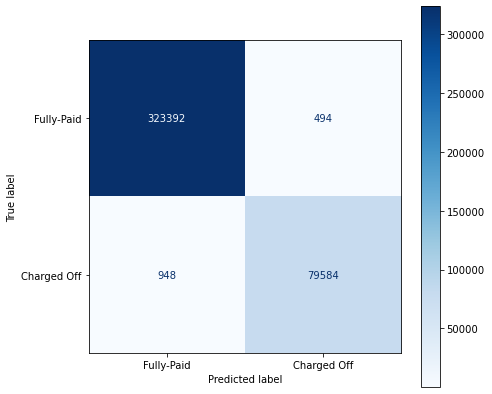

In [72]:
# downsampled
f, axs = plt.subplots(figsize=(7,7))
plot_confusion_matrix(log_model_downsampled, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'],ax=axs)


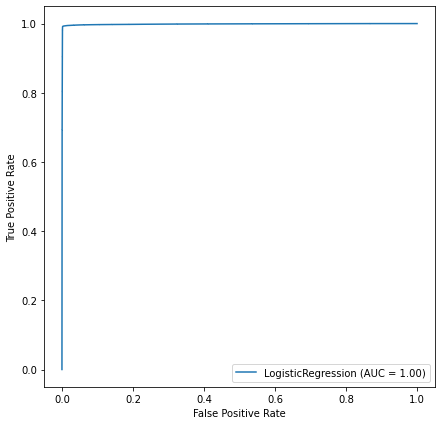

In [73]:
# downsampled
f, axs = plt.subplots(figsize=(7,7))
plot_roc_curve(log_model_downsampled, x_test, y_test,ax=axs)


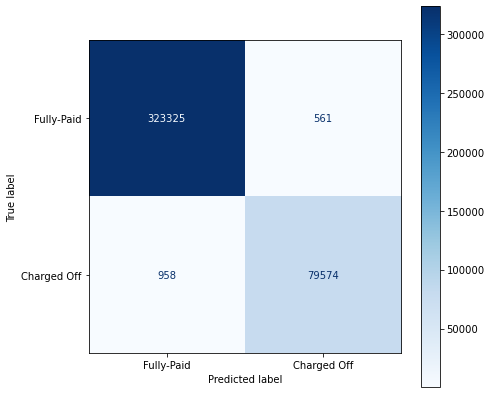

In [74]:
# upsampled
f, axs = plt.subplots(figsize=(7,7))
plot_confusion_matrix(log_model_upsampled, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'],ax=axs)


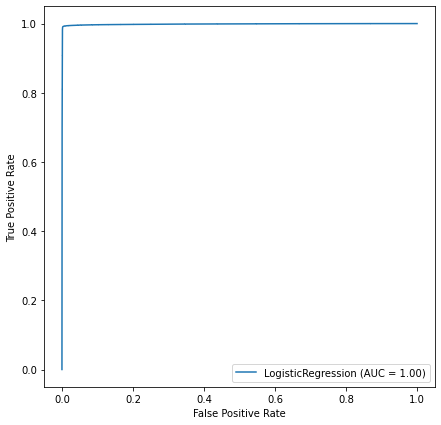

In [75]:
# upsampled
f, axs = plt.subplots(figsize=(7,7))
plot_roc_curve(log_model_upsampled, x_test, y_test,ax=axs)

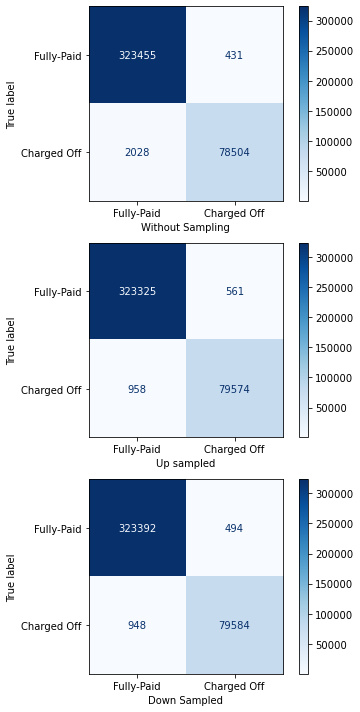

In [76]:
# confusion matrix for without sampling,upsampling and downsampling

f, axs = plt.subplots(nrows=3, ncols=1,figsize=(5,10))

plot_confusion_matrix(lr_model, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'],ax=axs[0])

plot_confusion_matrix(log_model_upsampled, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'],ax=axs[1])

plot_confusion_matrix(log_model_downsampled, x_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Fully-Paid','Charged Off'],ax=axs[2])

# axs[0].grid(False)
axs[0].set_xlabel('Without Sampling')
axs[1].set_xlabel('Up sampled')
axs[2].set_xlabel('Down Sampled')
f.tight_layout()
f.savefig('cm.png') 